## Task of muscle Modeling

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Propriedades do vasto medial
Umax = 0.04
Lslack = 0.223
Lce = 0.087
Lceopt = 0.093
width = 0.63*Lceopt
Fmax = 7400;
a = 0.25*Fmax
b = 0.25*10*Lceopt

# Condições Iniciais
phi = np.pi/2
phid = 0
#Lce = 0.31 - Lslack
t0 = 0
tend = 2.99
h = 0.001

In [3]:
t = np.arange(t0,tend,h)

F = np.empty_like(t)
F[0] = 0

In [4]:
F.shape

(2990,)

In [5]:
for i in range (1,len(t)):
    if t[i]<=1:   Lm = 0.31
    
    if t[i]>1 and t[i]<2:   Lm = 0.31 - 0.04*(t[i]-1)
    
    Lsee = Lm - Lce
    
    if (Lsee < Lslack): F[i] = 0
    else: F[i] = Fmax * ((Lsee-Lslack)/(Umax*Lslack))**2
    
    F0 = max([0, Fmax*(1-((Lce-Lceopt)/width)**2)])
    
    if F[i] > F0: print('Error: can not do excentric contractions')
        
    Lcedt = b*(F[i]-F0) / (F[i]+a)
    Lce = Lce + h * Lcedt
    

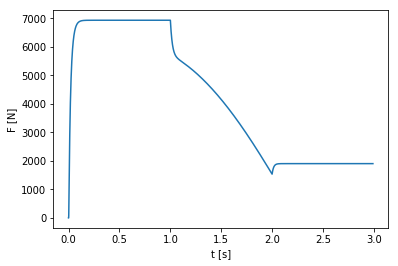

In [7]:
plt.plot (t,F)
plt.ylabel('F [N]')
plt.xlabel('t [s]')
plt.show()